In [11]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(1234)

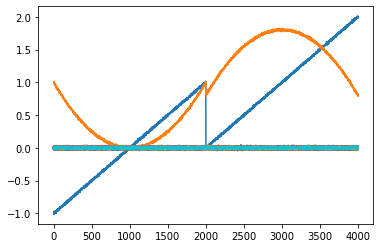

In [13]:
X = np.genfromtxt('./kernelpca.txt', delimiter='')
plt.plot(X)
plt.show()

No handles with labels found to put in legend.


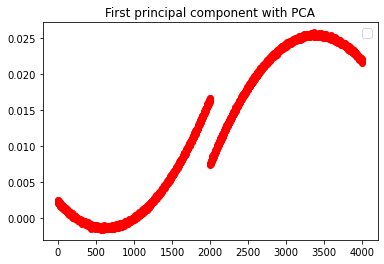

In [36]:
#Part e

def eigenvalue(A, v):
    Av = A.dot(v)
    return v.dot(Av)

def power_iteration(A):
    n, d = A.shape
    v = np.ones(d) / np.sqrt(d)
    ev = eigenvalue(A, v)
    while True:
        Av = A.dot(v)
        v_new = Av / np.linalg.norm(Av)
        ev_new = eigenvalue(A, v_new)
        if np.abs(ev - ev_new) < 0.01:
            break

        v = v_new
        ev = ev_new
    #return ev_new, v_new
    return v_new

covMatrix = np.cov(X,bias=True)
result = power_iteration(covMatrix)
plt.scatter(y=result,x=np.arange(0,len(result)),color ='red')
plt.title('First principal component with PCA')

plt.legend(loc=0, prop={'size': 12}, markerscale=1)
plt.show()

In [19]:
#Part f

def rbf_kernel(X, sigma=1):
    sq_dists = pdist(X, 'sqeuclidean')

    mat_sq_dists = squareform(sq_dists)
    gamma = 1/(2*sigma**2)
    
    K = np.exp(-gamma * mat_sq_dists)
    
    return K

In [24]:
def kernelpca(X, sigma):

    K = rbf_kernel(X, sigma)
    v = power_iteration(K)
    
    plt.scatter(v[0:2001], np.zeros(2001), s=0.01,  color ='red')
    plt.scatter(v[2001:], np.zeros(2001), s=0.01,  color ='blue')
    plt.title(f'sigma={sigma}')
    plt.show()
    
    plt.plot(v[0:2001],color ='red')
    plt.plot(v[2001:], color ='blue')
    plt.title(f'sigma={sigma}')
    plt.show()

In [47]:
# sigmas = [0.05, 0.1, 0.15, 0.2,0.25, 0.5, 1]

# for i in sigmas:
#     kernelpca(X, i)

In [50]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
import numpy as np
import plotly.graph_objects as go

def compute_eigenvalue(A, v):
    Av = A.dot(v)
    return v.dot(Av)

def power_iteration(A):
    n, d = A.shape

    v = np.ones(d)/np.sqrt(d)
    eigenvalue_v = compute_eigenvalue(A, v)

    while True:
        Av = A.dot(v)
        v_new = Av/np.linalg.norm(Av)

        eigenvalue_v_new = compute_eigenvalue(A, v_new)
        if np.abs(eigenvalue_v - eigenvalue_v_new) < 0.01:
            break

        v = v_new
        eigenvalue_v = eigenvalue_v_new

    return eigenvalue_v_new, v_new

def compute_RBF_kernel(X,sigma):
    pairwise_sq_dists = squareform(pdist(X, 'sqeuclidean'))
    K = np.exp(-pairwise_sq_dists / sigma**2)
    return K
    

    
fig = go.Figure()
n=4002
for sigma in [0.05,0.1,0.25,0.5,1]:
    K = compute_RBF_kernel(X,sigma=sigma)
    I_n = np.eye(n)-np.full((n,n),1./n)
    K_centered = I_n@K@I_n
    eigenvalue_Ktilde, eigenvector_Ktilde = power_iteration(K_centered)
    fig.add_trace(go.Scatter(x=np.arange(eigenvector_Ktilde.shape[0]),y=eigenvector_Ktilde,name=f'Sigma: {sigma}'))
    
fig.layout.title = f'First Principal Component (Kernel PCA), Kernel: RBF'
fig.layout.xaxis.title = 'Index'
fig.layout.yaxis.title = 'Value'
fig.layout.title.x = 0.5

fig.show()